In [1]:
#!pip install poppy

In [2]:
import numpy as np
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
import astropy.units as u
import poppy

In [3]:
pth_to_gbd = 'gbdpsf_165um_unobscured_OF17_150beams_1mmdet.fits'
pth_to_huy = 'huypsf_165um_unobscured_1024pupil_256pix_1mmdet.txt'

gbdpsf = fits.open(pth_to_gbd)[0].data**2
gbdpsf /= np.sum(gbdpsf)
huypsf = np.genfromtxt(pth_to_huy,encoding='UTF-16',skip_header=21,delimiter='\t')
huypsf /= np.sum(huypsf)
huypsf = shift(huypsf,[.5,-.5])

## Compare GBD with ZMX Huygens

C:\Users\LOFT_Olaf\AppData\Local\Temp\ipykernel_14528\3436211320.py:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow((psf1-psf2)/psf2,cmap='RdBu',vmin=-.5,vmax=.5)


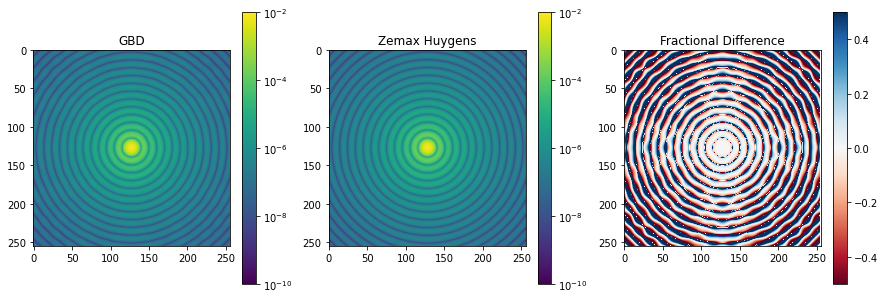

In [49]:
def compare2PSF(psf1,psf2,psftitle1='GBD',psftitle2='Zemax Huygens'):
    
    vmin = 1e-10
    vmax = 1e-2
    
    plt.figure(figsize=[15,5])
    plt.subplot(131)
    plt.title(psftitle1)
    plt.imshow(psf1,norm=LogNorm(vmin=vmin,vmax=vmax))
    plt.colorbar()
    plt.subplot(132)
    plt.title(psftitle2)
    plt.imshow(psf2,norm=LogNorm(vmin=vmin,vmax=vmax))
    plt.colorbar()
    plt.subplot(133)
    plt.title('Fractional Difference')
    plt.imshow((psf1-psf2)/psf2,cmap='RdBu',vmin=-.5,vmax=.5)
    plt.colorbar()

compare2PSF(gbdpsf,huypsf)

## Now try a comparison with Airy Analytical

In [50]:
pixscal = 3.9065e-6
efl = 57.6

airy=poppy.misc.airy_2d(diameter=2.4, wavelength=1.65e-6,
                              shape=(256,256), pixelscale=pixscal/efl*206265,
                             center=(127.5,127.5))

airy /= np.sum(airy)

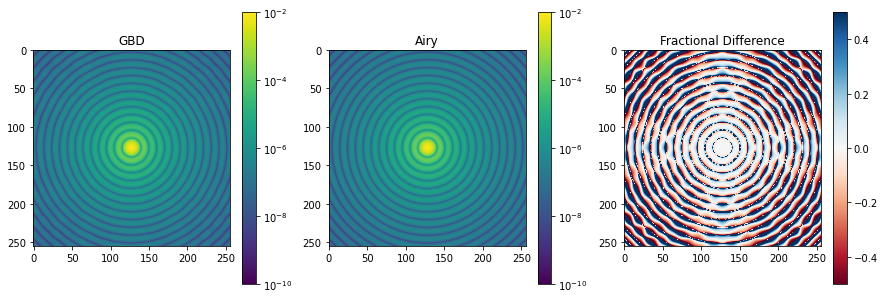

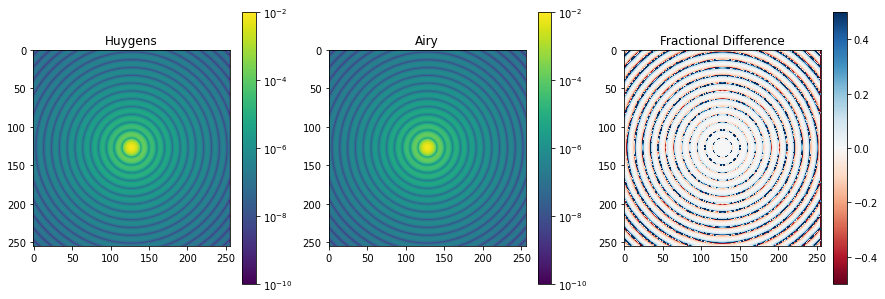

In [51]:
compare2PSF(gbdpsf,airy,psftitle2='Airy')
compare2PSF(huypsf,airy,psftitle2='Airy',psftitle1='Huygens')